#### 卷积操作

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
def startup():
    print("Convolutional Demo")
    img_file = r"C:\Users\wangheng\Documents\Tencent Files\673602165\Image\C2C\HT$2L{MQV8D9]4{2GAU5(K3.jpg"
    image = cv2.imread(img_file)
    new_img = cv2.resize(image, (256, 256))
    new_img = new_img.astype(np.float32) / 255.0
    new_img = new_img.reshape([1, 256, 256, 3])
    print(new_img.shape)
    
    x = tf.placeholder(dtype=tf.float32, shape=[None, 256, 256, 3])
    w_1 = tf.Variable(tf.truncated_normal(shape=[3, 3, 3, 6], mean=0.0, stddev=0.1))
    b_1 = tf.Variable(tf.truncated_normal(shape=[256, 256, 6], mean=0.0, stddev=0.0))
    z_1 = tf.nn.conv2d(input=x, filter=w_1, strides=[1, 1, 1, 1], padding='SAME') + b_1
    y_1_relu = tf.nn.relu(z_1)
    y_1_sigmod = tf.nn.sigmoid(z_1)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        y_1_relu = sess.run(y_1_relu, feed_dict={x:new_img})
        y_1_sigmod = sess.run(y_1_sigmod, feed_dict={x: new_img})
        fm1 = y_1_relu[0, :, :, 0:3]
        fm2 = y_1_relu[0, :, :, 3:6]
        fm3 = y_1_sigmod[0, :, :, 0:3]
        fm4 = y_1_sigmod[0, :, :, 3:6]
        print(new_img.shape)
        print(fm1.shape)
        print(fm2.shape)
        print(fm3.shape)
        print(fm4.shape)
        plt.figure(1)
        plt.subplot(2, 3, 1)
        plt.imshow(new_img[0, :, :, :])
        plt.axis('off')
        plt.title('origin')
        
        plt.subplot(2, 3, 2)
        plt.imshow(fm1)
        plt.axis('off')
        plt.title('relu_1')
        
        plt.subplot(2, 3, 3)
        plt.imshow(fm2)
        plt.axis('off')
        plt.title('relu_2')
        
        plt.subplot(2, 3, 4)
        plt.imshow(fm3)
        plt.axis('off')
        plt.title('sigmod_1')
        
        plt.subplot(2, 3, 5)
        plt.imshow(fm4)
        plt.axis('off')
        plt.title('sigmod_2')
        
        plt.show()
        

Convolutional Demo
(1, 256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


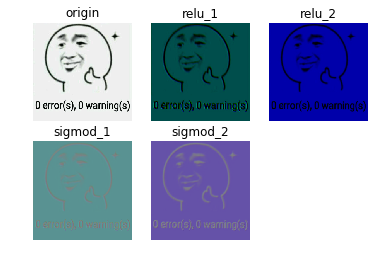

In [11]:
startup()